<a href="https://colab.research.google.com/github/Dain777666/ESAA_25-2/blob/main/%EB%B9%88%EA%B3%A4%EC%98%88%EC%B8%A1%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8(%EB%8B%A4%EC%9D%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# < Poverty Prediction Challenge >

 https://www.drivendata.org/competitions/305/competition-worldbank-poverty/page/963/


## (1) 데이터 불러오기 및 병합

- train_hh_gt.csv와 train_hh_features.csv 병합

In [ ]:
## 라이브러리 ##

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_colwidth', None)

from warnings import filterwarnings
filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## 데이터 로드(구글 드라이브) ##

hh_features = pd.read_csv('/content/drive/MyDrive/ESAA_OB_4조/방학 프로젝트/data/train_hh_features.csv')
hh_gt = pd.read_csv('/content/drive/MyDrive/ESAA_OB_4조/방학 프로젝트/data/train_hh_gt.csv')
test_df = pd.read_csv('/content/drive/MyDrive/ESAA_OB_4조/방학 프로젝트/data/test_hh_features.csv')
# train_rates = pd.read_csv('/content/drive/MyDrive/ESAA_OB_4조/방학 프로젝트/data/train_rates_gt.csv')

# hhid(가구 ID)를 기준으로 병합
train_df = pd.merge(hh_features, hh_gt[['hhid', 'cons_ppp17']], on='hhid')
print(train_df.shape, test_df.shape)

train = train_df.copy()
test = test_df.copy()

(104234, 89) (103023, 88)


In [ ]:
## 데이터 로드 ##

hh_features = pd.read_csv('train_hh_features.csv')
hh_gt = pd.read_csv('train_hh_gt.csv')
test_df = pd.read_csv('test_hh_features.csv')

# hhid(가구 ID)를 기준으로 병합
train_df = pd.merge(hh_features, hh_gt[['hhid', 'cons_ppp17']], on='hhid')
print(train_df.shape, test_df.shape)

train = train_df.copy()
test = test_df.copy()

(104234, 89)


In [ ]:
train.head()

,hhid,com,weight,strata,utl_exp_ppp17,male,hsize,num_children5,num_children10,num_children18,...,consumed4300,consumed4400,consumed4500,consumed4600,consumed4700,consumed4800,consumed4900,consumed5000,survey_id,cons_ppp17
0,100001,1,75,4,594.80627,Female,1,0,0,0,...,No,No,No,Yes,Yes,Yes,Yes,No,100000,25.258402
1,100002,1,150,4,1676.27230,Female,2,0,0,0,...,No,No,No,No,Yes,Yes,No,No,100000,16.996706
2,100003,1,375,4,506.93719,Male,5,0,0,2,...,Yes,No,Yes,Yes,Yes,Yes,No,Yes,100000,13.671848
3,100004,1,375,4,824.61786,Male,5,0,0,1,...,Yes,No,No,No,Yes,Yes,No,No,100000,7.189475
4,100005,1,525,4,351.47644,Male,7,1,0,0,...,No,No,Yes,No,Yes,Yes,Yes,No,100000,12.308855


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104234 entries, 0 to 104233
Data columns (total 89 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hhid               104234 non-null  int64  
 1   com                104234 non-null  int64  
 2   weight             104234 non-null  int64  
 3   strata             104234 non-null  int64  
 4   utl_exp_ppp17      104149 non-null  float64
 5   male               104234 non-null  object 
 6   hsize              104234 non-null  int64  
 7   num_children5      104234 non-null  int64  
 8   num_children10     104234 non-null  int64  
 9   num_children18     104234 non-null  int64  
 10  age                104234 non-null  int64  
 11  owner              104234 non-null  object 
 12  water              104234 non-null  object 
 13  toilet             104234 non-null  object 
 14  sewer              104234 non-null  object 
 15  elect              104234 non-null  object 
 16  wa

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103023 entries, 0 to 103022
Data columns (total 88 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hhid               103023 non-null  int64  
 1   com                103023 non-null  int64  
 2   weight             103023 non-null  int64  
 3   strata             103023 non-null  int64  
 4   utl_exp_ppp17      102740 non-null  float64
 5   male               103023 non-null  object 
 6   hsize              103023 non-null  int64  
 7   num_children5      103023 non-null  int64  
 8   num_children10     103023 non-null  int64  
 9   num_children18     103023 non-null  int64  
 10  age                103023 non-null  int64  
 11  owner              103023 non-null  object 
 12  water              103023 non-null  object 
 13  toilet             103023 non-null  object 
 14  sewer              103023 non-null  object 
 15  elect              103023 non-null  object 
 16  wa

## (2) 결측치 처리

In [ ]:
## train 데이터 ##

def fill_train_missing(df, regions):
    df = df.copy()

    # 공공요금 지출액: 지역별 평균
    if 'utl_exp_ppp17' in df.columns:
        df['utl_exp_ppp17'] = df['utl_exp_ppp17'].fillna(
            df.groupby(regions)['utl_exp_ppp17'].transform('mean'))

    # 고용 여부: 전체 최빈값
    if 'employed' in df.columns:
        df['employed'] = df['employed'].fillna(
            df['employed'].mode()[0])

    # Unknown 카테고리 처리('dweltyp', 'sector1d')
    unknown_cols = ['dweltyp', 'sector1d']
    for col in unknown_cols:
        if col in df.columns:
            df[col] = df[col].fillna("Unknown").astype(str)

    # 가구 내 최고 교육 수준: 지역별 최빈값
    if 'educ_max' in df.columns:
        df['educ_max'] = df['educ_max'].fillna(
            df.groupby(regions)['educ_max']
              .transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan))

    # 중등 교육 이수 비율: 지역별 평균
    if 'share_secondary' in df.columns:
        df['share_secondary'] = df['share_secondary'].fillna(
            df.groupby(regions)['share_secondary'].transform('mean'))

    # consumed 관련 컬럼: 지역별 최빈값
    consumed_cols = [c for c in df.columns if 'consumed' in c]
    for col in consumed_cols:
        df[col] = df[col].fillna(
            df.groupby(regions)[col]
              .transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan))

    return df

# 실행
regions = ['region1', 'region2', 'region3', 'region4', 'region5', 'region6', 'region7']

train = fill_train_missing(train, regions)

In [ ]:
## test 데이터 ##

def fill_test_missing(train_df, test_df, regions):
    test_df = test_df.copy()

    # 1. 공공요금 지출액: Train의 지역별 평균 적용
    if 'utl_exp_ppp17' in test_df.columns:
        # Train에서 지역별 평균 계산
        utl_map = train_df.groupby(regions)['utl_exp_ppp17'].mean()

        test_df = test_df.merge(utl_map.rename('utl_fill'), on=regions, how='left')
        test_df['utl_exp_ppp17'] = test_df['utl_exp_ppp17'].fillna(test_df['utl_fill'])
        test_df.drop(columns=['utl_fill'], inplace=True)

    # 2. 고용 여부: Train의 전체 최빈값 적용
    if 'employed' in test_df.columns:
        train_mode = train_df['employed'].mode()[0]
        test_df['employed'] = test_df['employed'].fillna(train_mode)

    # 3. Unknown 처리 ('dweltyp', 'sector1d')
    unknown_cols = ['dweltyp', 'sector1d']
    for col in unknown_cols:
        if col in test_df.columns:
            test_df[col] = test_df[col].fillna("Unknown").astype(str)

    # 4. 가구 내 최고 교육 수준 & 중등 교육 비율 & consumed 컬럼들
    # (그룹별 최빈값/평균을 적용해야 하므로 공통 로직 사용)

    # 4-1. 교육 수준 (최빈값)
    educ_map = train_df.groupby(regions)['educ_max'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    test_df = test_df.merge(educ_map.rename('educ_fill'), on=regions, how='left')
    test_df['educ_max'] = test_df['educ_max'].fillna(test_df['educ_fill'])
    test_df.drop(columns=['educ_fill'], inplace=True)

    # 4-2. 중등 교육 비율 (평균)
    share_map = train_df.groupby(regions)['share_secondary'].mean()
    test_df = test_df.merge(share_map.rename('share_fill'), on=regions, how='left')
    test_df['share_secondary'] = test_df['share_secondary'].fillna(test_df['share_fill'])
    test_df.drop(columns=['share_fill'], inplace=True)

    # 4-3. consumed 관련 컬럼 (최빈값)
    consumed_cols = [c for c in test_df.columns if 'consumed' in c]
    for col in consumed_cols:
        c_map = train_df.groupby(regions)[col].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
        test_df = test_df.merge(c_map.rename(f'{col}_fill'), on=regions, how='left')
        test_df[col] = test_df[col].fillna(test_df[f'{col}_fill'])
        test_df.drop(columns=[f'{col}_fill'], inplace=True)

    return test_df

# 실행
regions = ['region1', 'region2', 'region3', 'region4', 'region5', 'region6', 'region7']
test = fill_test_missing(train, test, regions)

In [ ]:
is_null = train.isnull().sum()
is_null[is_null != 0].sort_values(ascending=False)

,0


In [ ]:
is_null = test.isnull().sum()
is_null[is_null != 0].sort_values(ascending=False)

,0


## (3) 파생변수 생성

In [ ]:
## 기초 서비스 접근성 ##

def service_access(df):
    cols = ['elect', 'water', 'sewer', 'toilet']

    mapping = {
        'Access' : 1,
        'No access' : 0
    }

    df[cols] = df[cols].replace(mapping)
    df['count_infra'] = df[cols].sum(axis=1)
    return df

# 적용
train = service_access(train)
test = service_access(test)

In [ ]:
## 동물성 단백질 소비 다양성(육류, 내장류, 가금류 합산) ##
# consumed 800~1400

def meat_consume(df):
  cols = ['consumed800', 'consumed900', 'consumed1000', 'consumed1100',
          'consumed1200', 'consumed1300', 'consumed1400']

  mapping = {
      'Yes':1,
      'No':0
  }
  df[cols] = df[cols].replace(mapping)
  df['meat_consume'] = df[cols].sum(axis=1)

  return df

# 적용
train = meat_consume(train)
test = meat_consume(test)

In [ ]:
## 기호식품 및 외식 ##
# consumed1900(가공면), consumed4300(초콜릿, 사탕, 꿀), consumed4400~4600(술, 음료, 커피 등), consumed4700(외식/완제품)

def discretionary_consumption(df):
  cols = ['consumed1900', 'consumed4300', 'consumed4400', 'consumed4500',
          'consumed4600', 'consumed4700']

  mapping = {
      'Yes':1,
      'No':0
  }

  df[cols] = df[cols].replace(mapping)
  df['discretionary_consumption'] = df[cols].sum(axis=1)

  return df

# 적용
train = discretionary_consumption(train)
test = discretionary_consumption(test)

In [ ]:
## 1. [식단] 식단의 질 및 구성 점수화 ##

def create_food_features(df):
    basics_list = ['consumed100', 'consumed300', 'consumed500', 'consumed600',
                   'consumed1500', 'consumed1600', 'consumed1900', 'consumed2300',
                   'consumed2800', 'consumed3200', 'consumed3600']
    expansion_list = ['consumed400', 'consumed800', 'consumed900', 'consumed2000',
                      'consumed2200', 'consumed2400', 'consumed3900', 'consumed4000',
                      'consumed4100', 'consumed4200', 'consumed4300', 'consumed4400',
                      'consumed4500', 'consumed4700']

    # 카운트 생성
    df['basic_food_count'] = df[basics_list].apply(lambda x: (x == 'Yes').sum(), axis=1)
    df['quality_food_count'] = df[expansion_list].apply(lambda x: (x == 'Yes').sum(), axis=1)

    # [파생변수] 식단 질 지수
    df['food_quality_index'] = df['quality_food_count'] / (df['basic_food_count'] + 1)
    return df

## 2. [인구/경제] 부양비, 생계압박 및 고용 지표 ##

def create_economic_features(df):
    # [파생변수] 부양 가족 비율
    df['dependency_ratio'] = (df['num_children5'] + df['num_children10'] +
                              df['num_children18'] + df['num_elderly']) / df['hsize']

    # 성별 + 고용 결합
    df['sex_emp_combined'] = df['male'].astype(str) + "_" + df['employed'].astype(str)

    # [파생변수] 생계 압박 (가구 규모 대비 실제 경제 활동 인구의 비중)
    df['emp_hsize_density'] = (df['employed'] == 'Employed').astype(int) / np.log(df['hsize'] + 1)

    # [파생변수] 고위험군 플래그 (남성 가장 고용 + 대가족)
    df['high_poverty_risk'] = ((df['sex_emp_combined'] == 'Male_Employed') & (df['hsize'] >= 5)).astype(int)
    return df

## 3. [지역] 상대적 지출 및 지역 격차 논리 ##

def create_all_geo_features_onehot(df):
    region_cols = [f'region{i}' for i in range(1, 8)]

    for reg_col in region_cols:
        # 1. 해당 지역(reg_col == 1)인 데이터만 필터링하여 도시/농촌별 평균 계산
        # 예: region4가 1인 행들의 Urban 평균, Rural 평균을 각각 구함
        regional_urban_means = df[df[reg_col] == 1].groupby('urban')['utl_exp_ppp17'].mean()

        # 2. 계산된 평균값을 가구별 urban 값에 맞춰 매핑
        # map을 통해 Urban 행에는 Urban 평균을, Rural 행에는 Rural 평균을 할당
        mean_val_mapped = df['urban'].map(regional_urban_means)

        # 3. 파생변수 생성: 내 지출 / (내가 속한 지역의 도시/농촌 평균)
        # 단, 내가 해당 지역(reg_col == 1)에 속할 때만 지수를 계산하고, 아니면 0 또는 NaN
        index_col_name = f'rel_exp_index_{reg_col}'
        df[index_col_name] = np.where(
            df[reg_col] == 1,
            df['utl_exp_ppp17'] / (mean_val_mapped + 1e-9),
            0 # 해당 지역이 아니면 0으로 채움 (나중에 모델이 무시하도록 함)
        )

    return df
def create_geographic_features(df, gap_dict):
    # 지역별 불평등 격차 주입
    df['region_gap_value'] = 0
    for reg_col, gap_val in gap_dict.items():
        df.loc[df[reg_col] == 1, 'region_gap_value'] = gap_val

    # [파생 변수] 지역 격차 + 거주형태 반영 피처
    df['urban_gap_interaction'] = df.apply(
        lambda x: x['region_gap_value'] if x['urban'] == 'Rural' else 1.0, axis=1
    )

    # [파생 변수] 지역-도시 조합 ID
    def get_region_name(row):
        for reg_col in gap_dict.keys():
            if row[reg_col] == 1: return f"{reg_col}_{row['urban']}"
        return f"unknown_{row['urban']}"
    df['region_urban_id'] = df.apply(get_region_name, axis=1)

    return df

# 실행
gap_values = {'region1': 2.29, 'region2': 2.30, 'region3': 2.27, 'region4': 2.37,
              'region5': 1.93, 'region6': 2.22, 'region7': 2.04}

train = create_food_features(train)
train = create_economic_features(train)
train = create_all_geo_features_onehot(train)
train = create_geographic_features(train, gap_values)

test = create_food_features(test)
test = create_economic_features(test)
# create_all_geo_features_onehot 는 데이터 누수로 인해 따로 적용
test = create_geographic_features(test, gap_values)

In [ ]:
def create_all_geo_features_onehot_test(test_df, train_df):
    test_df = test_df.copy()

    # [지역: 상대적 지출 지수] ★Train 데이터의 평균을 사용하도록 수정★
    region_cols = [f'region{i}' for i in range(1, 8)]
    for reg_col in region_cols:
        # Train 데이터에서 해당 지역(reg_col == 1)의 도시/농촌별 평균 미리 계산
        regional_urban_means_train = train_df[train_df[reg_col] == 1].groupby('urban')['utl_exp_ppp17'].mean()

        # Test 데이터의 Urban/Rural에 Train 평균값 매핑
        mean_val_mapped = test_df['urban'].map(regional_urban_means_train)

        index_col_name = f'rel_exp_index_{reg_col}'
        test_df[index_col_name] = np.where(
            test_df[reg_col] == 1,
            test_df['utl_exp_ppp17'] / (mean_val_mapped + 1e-9),
            0
        )

    return test_df

# 실행
test = create_all_geo_features_onehot_test(test, train)

### 위와 흐름 동일하나 utl_exp_ppp17 을 hsize로 정규화함

In [ ]:
def create_all_geo_features_onehot_test_v2(test_df, train_df):
    test_df = test_df.copy()
    train_df = train_df.copy()

    # [사전 단계] 우승자 방식: 지출액을 가구 규모 로그값으로 정규화
    train_df['exp_norm'] = train_df['utl_exp_ppp17'] / np.log(train_df['hsize'] + 1)
    test_df['exp_norm'] = test_df['utl_exp_ppp17'] / np.log(test_df['hsize'] + 1)

    region_cols = [f'region{i}' for i in range(1, 8)]
    for reg_col in region_cols:
        # 정규화된 지출(exp_norm)의 Train 평균 계산
        regional_means_train = train_df[train_df[reg_col] == 1].groupby('urban')['exp_norm'].mean()

        # Test에 매핑 (결측 대비 전체 평균 fillna)
        mean_val_mapped = test_df['urban'].map(regional_means_train).fillna(train_df['exp_norm'].mean())

        index_col_name = f'rel_exp_index_{reg_col}'
        # 정규화된 내 지출 / 해당 지역의 정규화된 평균 지출
        test_df[index_col_name] = np.where(
            test_df[reg_col] == 1,
            test_df['exp_norm'] / (mean_val_mapped + 1e-9),
            0
        )

    # 임시로 쓴 exp_norm은 삭제 (메인 지수만 남김)
    test_df.drop(columns=['exp_norm'], inplace=True)
    return test_df

In [ ]:
def create_staple_dependence(df):
    df = df.copy()

    # consumed 컬럼 찾기
    consumed_cols = [c for c in df.columns if c.startswith('consumed')]

    # 안전한 매핑 (이미 1, 0이면 유지, Yes/No일 때만 변환)
    for col in consumed_cols:
        # 데이터가 문자열(object) 타입인 경우에만 실행
        if df[col].dtype == 'object':
            df[col] = df[col].map({'Yes': 1, 'No': 0}).fillna(df[col])
        # 이미 숫자형이거나 변환이 필요 없는 경우 그대로 유지됨

    # 기초 식료품 (staples) 컬럼 설정
    staple_cols = [
        'consumed100','consumed200','consumed300',
        'consumed1500','consumed1600','consumed1700',
        'consumed1800','consumed1900',
        'consumed500','consumed3500'
    ]
    staple_cols = [c for c in staple_cols if c in train.columns]

    # 합계 계산 (NaN이 있다면 0으로 처리하여 계산)
    # .sum(axis=1)은 기본적으로 숫자가 아닌 값은 무시하지만, 안전을 위해 fillna(0) 고려
    df['sum_staples'] = df[staple_cols].fillna(0).sum(axis=1)
    df['sum_all_food'] = df[consumed_cols].fillna(0).sum(axis=1)

    # 의존도 계산
    # sum_all_food가 0인 경우(분모가 0)를 대비해 0으로 채움
    df['staple_dependence'] = np.where(
        df['sum_all_food'] > 0,
        df['sum_staples'] / df['sum_all_food'],
        0
    )

    return df

# 실행
train = create_staple_dependence(train)
test = create_staple_dependence(test)

In [ ]:
## 도시-고용 시너지 ##

def create_urban_employment_synergy(df):
    """
    도시-고용 시너지 = urban * employed
    도시 거주(1) + 취업(1) = 경제적 자산 형성 속도 지표
    """
    df = df.copy()

    # urban, employed 컬럼 숫자로 강제 변환
    if 'urban' in df.columns:
        df['urban'] = pd.to_numeric(df['urban'], errors='coerce').fillna(0)
    else:
        print("Warning: 'urban' column not found")
        return df

    if 'employed' in df.columns:
        df['employed'] = pd.to_numeric(df['employed'], errors='coerce').fillna(0)
    else:
        print("Warning: 'employed' column not found")
        return df

    # 2) 교호작용 변수 생성 (0,1 → 0,1 값)
    df['urban_employment_synergy'] = df['urban'] * df['employed']

    # 3) 추가: 세부 분류 (0=둘다아님, 1=한개맞음, 2=둘다맞음)
    df['urban_employed_category'] = (
        df['urban'].astype(int) +
        df['employed'].astype(int)
    )

    return df

# 실행
train = create_urban_employment_synergy(train)
test = create_urban_employment_synergy(test)

In [ ]:
def create_sector_value_class(df):
    df = df.copy()

    if 'sector1d' not in df.columns:
        print("Warning: 'sector1d' column not found")
        return df

    # 1. 산업군별 매핑 사전 정의 (텍스트 기준)
    # 데이터에 나타난 정확한 문자열을 키값으로 넣어야 합니다.
    sector_map = {
        # 1: 농림어업 (저부가)
        'Agriculture, hunting and forestry': 1,
        'Fishing': 1,

        # 2: 제조/건설 (중부가)
        'Manufacturing': 2,
        'Construction': 2,
        'Mining and quarrying': 2,
        'Electricity, gas and water supply': 2,

        # 3: 서비스/금융/공공 (고부가)
        'Wholesale and retail trade': 3,
        'Transport, storage and communications': 3,
        'Hotels and restaurants': 3,
        'Financial intermediation': 3,
        'Real estate, renting and business activities': 3,
        'Public administration and defence': 3,
        'Education': 3,
        'Health and social work': 3,
        'Other community, social and personal service activities': 3,
        'Activities of private households as employers': 3
    }

    # 2. 매핑 적용 (사전에 없는 'Unknown'이나 결측치는 0으로 처리)
    # .str.strip()을 넣어 혹시 모를 앞뒤 공백을 제거해줍니다.
    df['sector_value_class'] = df['sector1d'].astype(str).str.strip().map(sector_map).fillna(0).astype(int)

    return df

# 적용
train = create_sector_value_class(train)
test = create_sector_value_class(test)

In [ ]:
## 교육 × 고용 상호작용 ##

def create_educ_employment_interaction(df):
    """
    교육 × 고용 상호작용 = educ_max * employed
    교육 자본이 고용을 통해 소비력으로 전환되는 효과 포착
    """
    df = df.copy()

    # 필수 컬럼 확인 및 숫자 변환
    required_cols = ['educ_max', 'employed']
    for col in required_cols:
        if col not in df.columns:
            print(f"Warning: '{col}' column not found")
            return df
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

    # 기본 상호작용 변수 (연속형)
    df['educ_employed_interaction'] = df['educ_max'] * df['employed']

    # 세분화된 카테고리 (0~3)
    df['educ_employed_category'] = (
        (df['educ_max'] > 0).astype(int) *
        df['employed'].astype(int)
    )

    # 고학력 취업 보너스 (educ_max 상위 25% + employed)
    educ_high_threshold = df['educ_max'].quantile(0.75)
    df['high_educ_employed_bonus'] = (
        (df['educ_max'] > educ_high_threshold).astype(int) *
        df['employed'].astype(int)
    )

    return df

# 적용
train = create_educ_employment_interaction(train)

In [ ]:
def create_educ_employment_interaction_test(test_df, train_df):
    test_df = test_df.copy()

    # 1. 필수 컬럼 확인 및 숫자 변환
    required_cols = ['educ_max', 'employed']
    for col in required_cols:
        if col not in test_df.columns:
            print(f"Warning: '{col}' column not found")
            return test_df
        test_df[col] = pd.to_numeric(test_df[col], errors='coerce').fillna(0)

    # 2. 기본 상호작용 변수 (연속형)
    test_df['educ_employed_interaction'] = test_df['educ_max'] * test_df['employed']

    # 3. 세분화된 카테고리 (0~3)
    test_df['educ_employed_category'] = (
        (test_df['educ_max'] > 0).astype(int) *
        test_df['employed'].astype(int)
    )

    # 4. 고학력 취업 보너스 ★Train의 기준값(Threshold)을 사용★
    educ_high_threshold_train = train_df['educ_max'].quantile(0.75)
    test_df['high_educ_employed_bonus'] = (
        (test_df['educ_max'] > educ_high_threshold_train).astype(int) *
        test_df['employed'].astype(int)
    )

    return test_df

# 실행
test = create_educ_employment_interaction_test(test, train)

### hsize 정규화 활용 피처

- utl_exp_ppp17 추가로 삭제하면 될 듯함

In [ ]:
# 1. 단백질 섭취 효율성: 가구원 수 대비 육류/내장류/가금류 소비 다양성 (영양 상태의 질 측정)
train['meat_consume_div_log_hsize'] = train['meat_consume'] / np.log(train['hsize'] + 1)

# 2. 기호품 소비 밀도: 인원수 대비 가공식품, 외식, 주류 등 기호적 지출의 집중도 (경제적 여유 측정)
train['discretion_div_log_hsize'] = train['discretionary_consumption'] / np.log(train['hsize'] + 1)

# 3. 기초 식단 충실도: 가구 규모를 고려한 필수 식재료(쌀, 빵 등)의 확보 수준
train['basic_food_count_adj'] = train['basic_food_count'] / np.log(train['hsize'] + 1)

# 4. 고부가 식단 비중: 인원수 대비 고품질 식재료(유제품, 과일 등) 소비의 상대적 수준
train['quality_food_count_adj'] = train['quality_food_count'] / np.log(train['hsize'] + 1)

# 5. 전체 식단 다양성 지수: 가구원 수의 영향을 제거한 순수 식품 소비 범주의 넓이
train['food_variety_log_hsize'] = train['sum_all_food'] / np.log(train['hsize'] + 1)

# 6. 정규화된 공공요금 지출: 가구 규모에 따른 규모의 경제를 반영한 인당 에너지/수도 사용 수준
train['utl_exp_norm'] = train['utl_exp_ppp17'] / np.log(train['hsize'] + 1)

In [ ]:
# test 데이터셋에도 동일한 정규화 로직
test['meat_consume_div_log_hsize'] = test['meat_consume'] / np.log(test['hsize'] + 1)
test['discretion_div_log_hsize'] = test['discretionary_consumption'] / np.log(test['hsize'] + 1)
test['basic_food_count_adj'] = test['basic_food_count'] / np.log(test['hsize'] + 1)
test['quality_food_count_adj'] = test['quality_food_count'] / np.log(test['hsize'] + 1)
test['food_variety_log_hsize'] = test['sum_all_food'] / np.log(test['hsize'] + 1)
test['utl_exp_norm'] = test['utl_exp_ppp17'] / np.log(test['hsize'] + 1)

## (4) 불필요한 칼럼 삭제


In [ ]:
train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104234 entries, 0 to 104233
Data columns (total 118 columns):
 #    Column                     Non-Null Count   Dtype  
---   ------                     --------------   -----  
 0    hhid                       104234 non-null  int64  
 1    com                        104234 non-null  int64  
 2    weight                     104234 non-null  int64  
 3    strata                     104234 non-null  int64  
 4    utl_exp_ppp17              104234 non-null  float64
 5    male                       104234 non-null  object 
 6    hsize                      104234 non-null  int64  
 7    num_children5              104234 non-null  int64  
 8    num_children10             104234 non-null  int64  
 9    num_children18             104234 non-null  int64  
 10   age                        104234 non-null  int64  
 11   owner                      104234 non-null  object 
 12   water                      104234 non-null  int64  
 13   toilet      

In [ ]:
test.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103023 entries, 0 to 103022
Data columns (total 117 columns):
 #    Column                     Non-Null Count   Dtype  
---   ------                     --------------   -----  
 0    hhid                       103023 non-null  int64  
 1    com                        103023 non-null  int64  
 2    weight                     103023 non-null  int64  
 3    strata                     103023 non-null  int64  
 4    utl_exp_ppp17              103023 non-null  float64
 5    male                       103023 non-null  object 
 6    hsize                      103023 non-null  int64  
 7    num_children5              103023 non-null  int64  
 8    num_children10             103023 non-null  int64  
 9    num_children18             103023 non-null  int64  
 10   age                        103023 non-null  int64  
 11   owner                      103023 non-null  object 
 12   water                      103023 non-null  int64  
 13   toilet      

* 중간변수 삭제

In [ ]:
intermediate_cols = ['sex_emp_combined', 'region_gap_value', 'basic_food_count', 'quality_food_count',
                     'sum_staples','sum_all_food']

train_cleaned = train.drop(columns=intermediate_cols)
test_cleaned = test.drop(columns=intermediate_cols)

* 피처 간 상관관계 확인

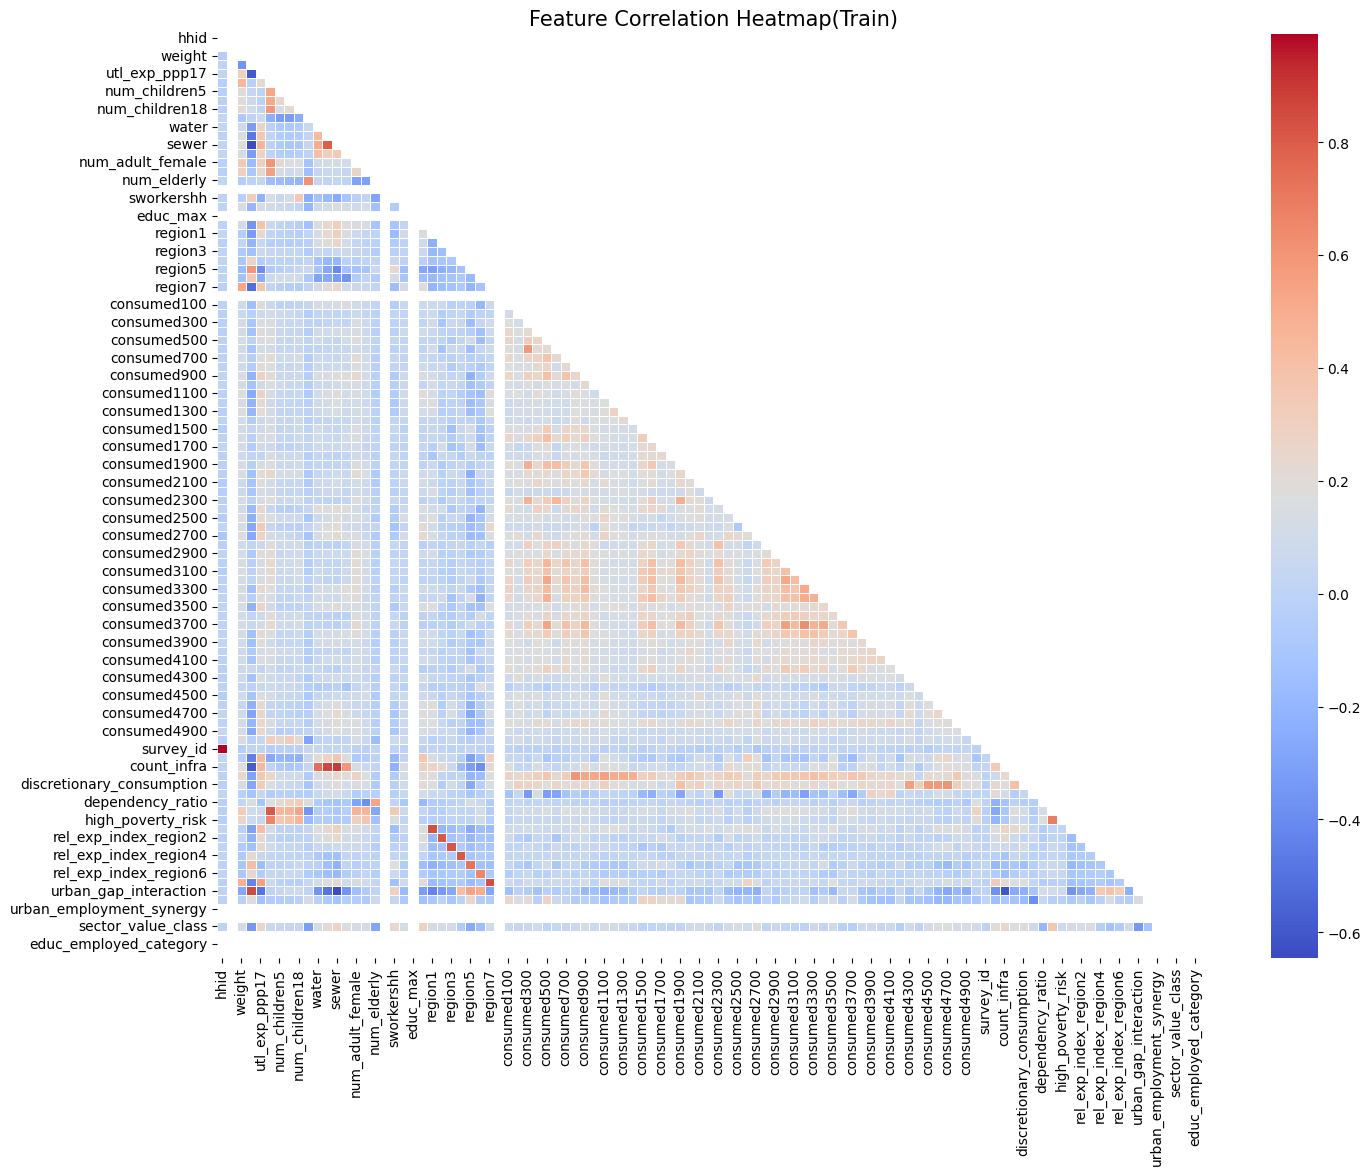

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 계산 (수치형 변수만 대상)
corr = train_cleaned.select_dtypes(include=[np.number]).corr()
# 히트맵 시각화
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr, dtype=bool)) # 상단 삼각형 가리기 (중복 제거)

sns.heatmap(corr,
            mask=mask,
            annot=False, # 변수가 많을 때는 False, 적을 때는 True로 수치 표시
            fmt=".2f",
            cmap='coolwarm',
            linewidths=0.5)

plt.title('Feature Correlation Heatmap(Train)', fontsize=15)
plt.show()

In [ ]:
# 1. 숫자형 피처만 선택
numeric_col = train_cleaned.select_dtypes(include=[np.number])

# 2. 상관계수 행렬 생성
corr = numeric_col.corr()
target_corr = corr['cons_ppp17'] # 타겟변수와의 상관관계 따로 추출

# 3. 중복 제거를 위해 상삼각 행렬(Upper Triangle)만 추출
# 자기 자신과의 관계(1.0)와 중복 쌍(A-B, B-A)을 제거합니다.
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# 4. 0.7 이상인 값만 필터링 (절대값 기준)
high_corr_list = []
for col in upper.columns:
    for row in upper.index:
        # 타겟 변수 자체는 리스트에서 제외 (자기 자신과의 관계 방지)
        if col == 'cons_ppp17' or row == 'cons_ppp17':
            continue

        if abs(upper.loc[row, col]) >= 0.7:
            high_corr_list.append({
                'Feature 1': row,
                'Feature 2': col,
                'Corr_Between': round(upper.loc[row, col], 4),
                'F1_Target_Corr': round(target_corr[row], 4), # Feature 1과 타겟의 관계
                'F2_Target_Corr': round(target_corr[col], 4)  # Feature 2와 타겟의 관계
            })

# 5. 결과 데이터프레임 만들기
high_corr_df = pd.DataFrame(high_corr_list)

# 6. 상관계수 높은 순으로 정렬하여 출력
if not high_corr_df.empty:
    # 정렬: 피처 간 상관계수가 높은 순
    high_corr_df = high_corr_df.sort_values(by='Corr_Between', ascending=False)
    print("--- 상관계수 0.7 이상 피처 쌍 & 타겟 영향력 비교 ---")
    display(high_corr_df)
else:
    print("상관계수 0.7 이상인 피처 쌍이 없습니다.")

--- 상관계수 0.7 이상 피처 쌍 & 타겟 영향력 비교 ---


,Feature 1,Feature 2,Corr_Between,F1_Target_Corr,F2_Target_Corr
1,hhid,survey_id,0.9926,0.0205,0.0164
4,sewer,count_infra,0.8931,0.3688,0.3407
3,toilet,count_infra,0.8588,0.2814,0.3407
12,strata,urban_gap_interaction,0.8483,-0.4460,-0.3717
11,region7,rel_exp_index_region7,0.8454,0.3001,0.3167
6,region1,rel_exp_index_region1,0.8449,0.1296,0.1695
8,region3,rel_exp_index_region3,0.8169,0.0549,0.0988
9,region4,rel_exp_index_region4,0.8169,-0.0524,-0.0269
5,hsize,emp_hsize_pressure,0.8131,-0.2728,-0.2673
7,region2,rel_exp_index_region2,0.8127,0.0641,0.1172


* 최종 칼럼 드롭

In [ ]:
high_corr_cols = ['sewer','toilet','elect','water','strata','hsize'] + regions
model_drop_cols = ['hhid','survey_id','weight'] # 모델링 시 제외할 칼럼

final_drop =  high_corr_cols + model_drop_cols

train_cleaned = train_cleaned.drop(columns=[c for c in final_drop if c in train_cleaned.columns])
test_cleaned = test_cleaned.drop(columns=[c for c in final_drop if c in test_cleaned.columns])

print(f"최종 훈련 피처 개수: {len(train_cleaned.columns)}")

최종 훈련 피처 개수: 96


* 칼럼 일치 확인

In [ ]:
print(f"Train columns: {len(train_cleaned.columns)}")
print(f"Test columns: {len(test_cleaned.columns)}")

# train_cleaned 와 test_cleaned 간의 컬럼 차이 확인
diff_train_not_test = set(train_cleaned.columns) - set(test_cleaned.columns)
diff_test_not_train = set(test_cleaned.columns) - set(train_cleaned.columns)

if diff_train_not_test:
    print(f"train_cleaned에는 있지만 test_cleaned에는 없는 컬럼: {diff_train_not_test}")
if diff_test_not_train:
    print(f"test_cleaned에는 있지만 train_cleaned에는 없는 컬럼: {diff_test_not_train}")

Train columns: 96
Test columns: 95
train_cleaned에는 있지만 test_cleaned에는 없는 컬럼: {'cons_ppp17'}


## (5) 베이스라인 코드

### (5-2) CatBoost



In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def train_catboost_baseline(train_df, test_df):
    # 1. 학습에 사용할 피처 선택 (ID 및 타겟 제외)
    target_col = ['cons_ppp17']
    features = [c for c in train_df.columns if c not in target_col]

    # 2. 범주형 변수 처리
    # CatBoost는 결측치가 있는 object 타입을 바로 넣으면 에러가 날 수 있으므로 string으로 형변환
    cat_features = train_df[features].select_dtypes(include=['object', 'category']).columns.tolist()

    for col in cat_features:
        # NaN을 'None' 문자열로 채우고 전체를 string으로 변환 (안전성 확보)
        train_df[col] = train_df[col].fillna('None').astype(str)
        test_df[col] = test_df[col].fillna('None').astype(str)

    # 3. 타겟 변수 및 가중치 설정
    y = np.log1p(train_df['cons_ppp17']) # 타겟 로그 변환
    weights = train_df['weight']

    # 4. 교차 검증 설정 (5-Fold)
    # [주의] 대회 특성상 survey_id 기준 GroupKFold가 더 적합할 수 있습니다.
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    oof_preds = np.zeros(len(train_df))
    test_preds = np.zeros(len(test_df))

    # 5. 모델 파라미터
    params = {
        'loss_function': 'RMSE',
        'eval_metric': 'RMSE',
        'iterations': 2000,           # 트리 개수
        'learning_rate': 0.05,
        'depth': 6,                   # 트리의 깊이 (기본값 6)
        'random_seed': 42,
        'verbose': 500,               # 500번마다 로그 출력
        'early_stopping_rounds': 50,
        # 'task_type': 'GPU'          # GPU 사용 시 주석 해제
    }

    # 6. 학습 시작
    for fold, (train_idx, val_idx) in enumerate(kf.split(train_df)):
        print(f"\n--- Fold {fold+1} Training ---")

        X_train, X_valid = train_df[features].iloc[train_idx], train_df[features].iloc[val_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[val_idx]
        w_train, w_valid = weights.iloc[train_idx], weights.iloc[val_idx]

        # CatBoost 전용 Pool 객체 생성 (메모리 효율 및 범주형 처리에 필수)
        train_pool = Pool(data=X_train, label=y_train, weight=w_train, cat_features=cat_features)
        val_pool = Pool(data=X_valid, label=y_valid, weight=w_valid, cat_features=cat_features)

        # 모델 학습
        model = CatBoostRegressor(**params)
        model.fit(train_pool,
                  eval_set=val_pool,
                  use_best_model=True)

        # 예측 (검증셋 및 테스트셋)
        # Pool 객체를 사용하여 예측하면 더 빠릅니다
        oof_preds[val_idx] = np.expm1(model.predict(val_pool))

        # Test 데이터도 Pool로 만들거나 DataFrame을 직접 넣을 수 있습니다
        test_preds += np.expm1(model.predict(test_df[features])) / kf.n_splits

    # 최종 결과 출력
    rmse = np.sqrt(mean_squared_error(train_df['cons_ppp17'], oof_preds))
    print(f"\nFinal Out-of-Fold RMSE: {rmse:.4f}")

    return model, oof_preds, test_preds